# Get data

In [1]:
%matplotlib widget
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
K = 10
T = 2
r = 0.02
sig = 0.15

Smin = 1e-10 # can no longer use Smin = 0 as log(0) = -inf, use a small number as replacement
Smax = 5000 # can use even larger Smax as ln transformation squishes results quicker
Zmin = np.log(Smin) # low boundary
Zmax = np.log(Smax) # high bonudary

In [3]:
l6 = pd.read_csv('CN l6 data.csv')
l10 = pd.read_csv('CN l10 data.csv')
l5 = pd.read_csv('CN l5 data.csv')
l4 = pd.read_csv('CN l4 data.csv')
l3 = pd.read_csv('CN l3 data.csv')
l3

,Real Errors,dt,dz,lambda,Entire Errors
0,0.016611,0.3000,0.1000,3.0,9.607894
1,0.001522,0.1500,0.0500,3.0,9.607894
2,0.000478,0.0750,0.0250,3.0,9.607894
3,0.000070,0.0300,0.0100,3.0,9.607894
4,0.000018,0.0150,0.0050,3.0,9.607894
5,0.000004,0.0075,0.0025,3.0,9.607894
6,0.000002,0.0030,0.0010,3.0,9.607894


In [4]:
l3 = l3.sort_values('dz')
l4 = l4.sort_values('dz')
l5 = l5.sort_values('dz')
l6 = l6.sort_values('dz')
l10 = l10.sort_values('dz')

## Correct $\lambda$ values in tables

In [5]:
# Correct lambda values in tables
l3_max_errors = np.asarray(l3['Real Errors'])
l3_dz = np.asarray(l3['dz'])
l3_dt = np.asarray(l3['dt'])

l3_lda = []
for i in range(len(l3_dz)):
    iZ = round((Zmax-Zmin) / l3_dz[i])
    dZ = (Zmax-Zmin)/iZ # update to fit grid boundaries

    nt = int(round(T/l3_dt[i])) # number of steps in time
    dt = T/nt
    
    lda = dt/dZ
    l3_lda.append(lda)
    
l3_lda = np.array(l3_lda)
l3_lda

array([2.99849656, 2.996203  , 3.00770528, 2.98478655, 2.96361636,
       3.0776016 , 2.85324396])

In [6]:
l4_max_errors = np.asarray(l4['Real Errors'])
l4_dz = np.asarray(l4['dz'])
l4_dt = np.asarray(l4['dt'])

l4_lda = []
for i in range(len(l4_dz)):
    iZ = round((Zmax-Zmin) / l4_dz[i])
    dZ = (Zmax-Zmin)/iZ # update to fit grid boundaries

    nt = int(round(T/l4_dt[i])) # number of steps in time
    dt = T/nt
    
    lda = dt/dZ
    l4_lda.append(lda)
    
l4_lda = np.array(l4_lda)
l4['lambda'] = l4_lda

In [7]:
l5_max_errors = np.asarray(l5['Real Errors'])
l5_dz = np.asarray(l5['dz'])
l5_dt = np.asarray(l5['dt'])

l5_lda = []
for i in range(len(l5_dz)):
    iZ = round((Zmax-Zmin) / l5_dz[i])
    dZ = (Zmax-Zmin)/iZ # update to fit grid boundaries

    nt = int(round(T/l5_dt[i])) # number of steps in time
    dt = T/nt
    
    lda = dt/dZ
    l5_lda.append(lda)
    
l5_lda = np.array(l5_lda)
l5['lambda'] = l5_lda

In [8]:
l6_max_errors = np.asarray(l6['Real Errors'])
l6_dz = np.asarray(l6['dz'])
l6_dt = np.asarray(l6['dt'])

l6_lda = []
for i in range(len(l6_dz)):
    iZ = round((Zmax-Zmin) / l6_dz[i])
    dZ = (Zmax-Zmin)/iZ # update to fit grid boundaries

    nt = int(round(T/l6_dt[i])) # number of steps in time
    dt = T/nt
    
    lda = dt/dZ
    l6_lda.append(lda)
    
l6_lda = np.array(l6_lda)
l6['lambda'] = l6_lda

In [9]:
l10_max_errors = np.asarray(l10['Real Errors'])
l10_dz = np.asarray(l10['dz'])
l10_dt = np.asarray(l10['dt'])

l10_lda = []
for i in range(len(l10_dz)):
    iZ = round((Zmax-Zmin) / l10_dz[i])
    dZ = (Zmax-Zmin)/iZ # update to fit grid boundaries

    nt = int(round(T/l10_dt[i])) # number of steps in time
    dt = T/nt
    
    lda = dt/dZ
    l10_lda.append(lda)
    
l10_lda = np.array(l10_lda)
l10['lambda'] = l10_lda

# Initial Conditions Plot

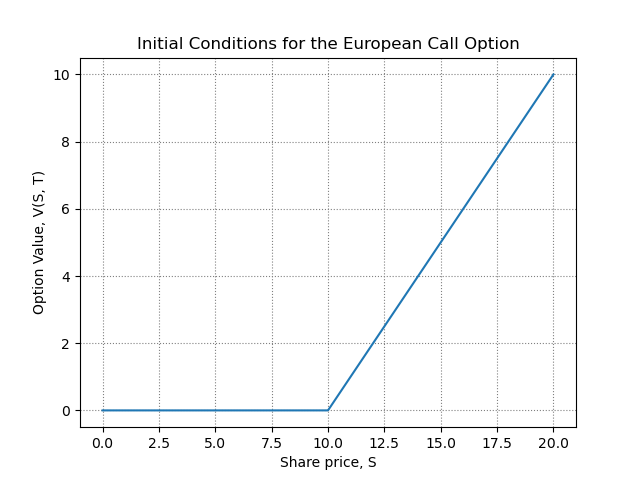

In [10]:
S = np.linspace(0, 20, 1000)
VIC = np.maximum(S - K, 0)

plt.figure()
plt.title('Initial Conditions for the European Call Option')
plt.xlabel('Share price, S')
plt.ylabel('Option Value, V(S, T)')
plt.grid(True, linestyle='dotted', color='grey')
plt.plot(S, VIC)
plt.show()

C:\Users\oloth\AppData\Local\Temp\ipykernel_40816\3671064332.py:3: RuntimeWarning: divide by zero encountered in log
  x = np.log(S)


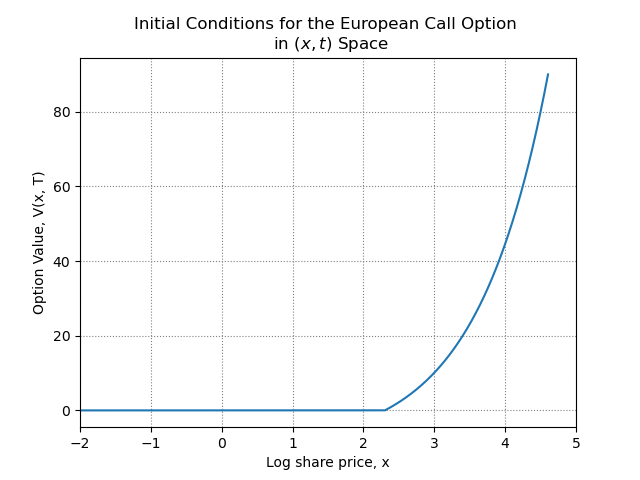

In [11]:
N = 10000
S = np.linspace(0, 100, N)
x = np.log(S)
VICx = np.maximum(np.exp(x) - K, 0)

plt.figure()
plt.title('Initial Conditions for the European Call Option \n in $(x, t)$ Space')
plt.xlabel('Log share price, x')
plt.ylabel('Option Value, V(x, T)')
plt.grid(True, linestyle='dotted', color='grey')
plt.plot(x, VICx)
plt.xlim(-2, 5)
plt.show()

### Smooth function estimation of Initial Conditions

In [12]:
from scipy.ndimage import gaussian_filter1d as gauss_filter
N = len(VICx)
VIC_gf = gauss_filter(VICx, sigma= 0.001*N)

In [13]:
print(150/10000)

0.015


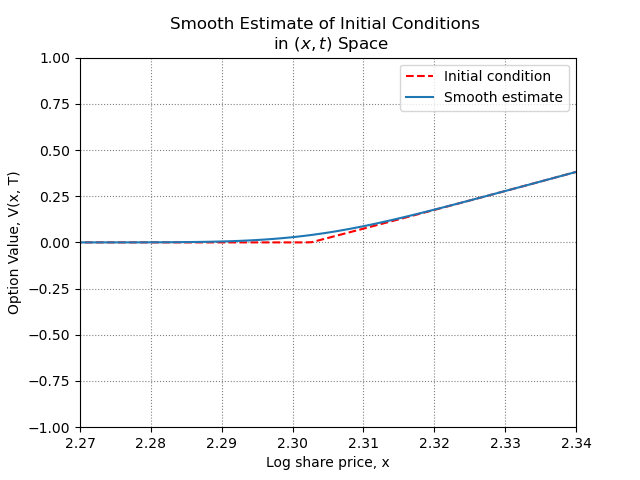

In [14]:
plt.figure()
plt.title('Smooth Estimate of Initial Conditions \n in $(x, t)$ Space')
plt.xlabel('Log share price, x')
plt.ylabel('Option Value, V(x, T)')
plt.grid(True, linestyle='dotted', color='grey')
plt.plot(x, VICx, label='Initial condition', linestyle='dashed', color='red')
plt.plot(x, VIC_gf, label='Smooth estimate')
plt.legend()
plt.xlim(2.27, 2.34)
plt.ylim(-1, 1)
plt.show()

# Results using smooth initial conditions for Crank-Nicolson

In [15]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import math as m
import time 

## The Thomas Algorithm
The thomas algorithm is a more computationally efficient way to solve for the unknowns as compared to matrix inversion (works via LU decomposition).

In [16]:
# Define the tridiagonal matrix solver algorithm for BLACK-SCHOLES EQUATION FORMAT
'''
For Tx = d
Inputs:
    - a = lower triangular vector
    - b = diagonal vector
    - c = upper diagonal vector
    - d = -aV_{i-1}^n + (1 + b)V_i^n - cV_{i+1}^n = constant term of knowns for share prices (i-1, i, i+1) at time n
Output:
    - unew = updated v values over space for time n+1
'''
def TDMA(a,b,c,d):
    n = len(d)
    e = np.zeros(n-1)
    f = np.zeros(n)
    V = np.zeros(n)
    
    e[0] = c[0]/b[0]
    f[0] = d[0]/b[0]
    for i in range(1,n-1):
        e[i] = c[i]/(b[i] - a[i]*e[i-1])
    for i in range(1,n):
        f[i] = (d[i] - a[i]*f[i-1])/(b[i] - a[i]*e[i-1])
    
    V[n-1] = f[n-1]
    for i in range(n-1,0,-1):
        V[i-1] = f[i-1] - e[i-1]*V[i]
    return V

In [17]:
### // CALL OPTION PARAMETERS /// ###
sig = 0.15 # volatility (std deviation of log returns)
K = 10 # dollars
T = 2 # years
r = 0.02 # yearly risk free interest rate

## Analytical Solution

In [18]:
# import packages
import matplotlib.pyplot as plt
import numpy as np
import math
#import sympy as sy

def erf(x):
    if isinstance(x, (int, float)):
        erf = m.erf(x)
    else:
        erf = np.array([m.erf(x) for x in x])
        
    return erf


# function for N(x) - normal CDF
def N(x) :
    return 0.5*(erf(x/np.sqrt(2)) + 1)


'''
# function to calculate the analytical solution to the black scholes equation for a european call given parameters
# INPUTS : 
    - S = stock price (vector)
    - t = time
    - sig = volatility 
    - K = strike price 
    - T = expiry time 
    - r = risk free rate 
    - N = Cumulative normal distribution function (defined above)
OUTPUTS : 
    - Analytical solution for European Call
'''
def BS_analytic_point_S(S, t, sig = sig, K = K, T = T, r = r, N = N) :
    # S=0 implies a zero value, S=0 implies the log going to negative infinity and the cumulative distributions having values 0.
    S1=S[0]
    ECall1 = np.array([0])
    
    S2=S[1:]
    
    def d1(S):
        return (np.log(S/K) + (r + 0.5*sig**2) * (T - t)) / (sig * (T - t)**(0.5)) 

    def d2(S):
        return (np.log(S/K) + (r - 0.5*sig**2) * (T - t)) / (sig * (T - t)**(0.5))
            
    ECall2 = S2*N(d1(S2)) - K*np.exp(-r*(T-t))*N(d2(S2))
    
    ECall = np.concatenate([ECall1, ECall2])
    
    return ECall

'''
Same as above, now considering transformed Z grid where z = lnS.
'''

def BS_analytic_point_Z(Z, t, sig = sig, K = K, T = T, r = r, N = N) :
    # S=0 implies a zero value, S=0 implies the log going to negative infinity and the cumulative distributions having values 0.
    def d1(Z):
        return (Z - np.log(K) + (r + 0.5*sig**2) * (T - t)) / (sig * (T - t)**(0.5))
    
    def d2(Z):
        return (Z - np.log(K) + (r - 0.5*sig**2) * (T - t)) / (sig * (T - t)**(0.5))
    
    ECall = np.where(np.exp(Z) == 0, 0, np.exp(Z)*N(d1(Z)) - K*np.exp(-r*(T-t))*N(d2(Z)))
    
    return ECall


'''
Same as above, now considering transformed Z grid where z = lnS - (r-0.5*sigma^2)*t i.e. the diffusion transformation.
'''
def BS_analytic_point_D(Z, t, sig = sig, K = K, T = T, r = r, N = N) :
    # S=0 implies a zero value, S=0 implies the log going to negative infinity and the cumulative distributions having values 0.
    def d1(Z):
        return (Z + (r - 0.5*sig**2)*t - np.log(K) + (r + 0.5*sig**2) * (T - t)) / (sig * (T - t)**(0.5))
    
    def d2(Z):
        return (Z + (r - 0.5*sig**2)*t - np.log(K) + (r - 0.5*sig**2) * (T - t)) / (sig * (T - t)**(0.5)) # r terms cancel in t
            
    ECall = np.where(np.exp(Z + (r - 0.5*sig**2)*t) == 0, 0, np.exp(Z + (r - 0.5*sig**2)*t) * N(d1(Z)) - K * np.exp(-r*(T - t)) * N(d2(Z)))
            
    return ECall


'''
Function to calculate analytic Black-Scholes solution given a grid in share price and values specifying the time grid.
INPUTS:
    - S = 1D array of S grid over time (entries = S grid values)
    - dt = time step
    - nt = total number of timesteps
OUTPUT:
    - 2D array of analytical solution over grid values
'''
# function BSASEC for grid of S and t
def BSa_S(S, dt, nt):
    # empty solution matrix
    Asol = np.zeros((len(S),nt+1))
    
    # Initial Conditions
    VIC = np.maximum(S - K, 0)
    Asol[:,0] = VIC # corresponding to t = T
    
    # Solving backwards in time
    for n in range(1, nt+1):
        Asol[:,n] = BS_analytic_point_S(S=S, t=T - n*dt)
    
    return Asol


def BSa_Z(Z, dt, nt):
    # empty solution matrix
    Asol = np.zeros((len(Z),nt+1))
    
    # Initial Conditions
    VIC = np.maximum(np.exp(Z) - K, 0)
    Asol[:,0] = VIC # corresponding to t = T
    
    # Solving backwards in time
    for n in range(1, nt+1):
        Asol[:,n] = BS_analytic_point_Z(Z=Z, t=T - n*dt)
    
    
    return Asol


'''
Function BSASEC for grid of S and t
INPUTS:
    - Z = 1D array of Z grid that, when transformed back to S, moves over time (row = S grid values, column = time) 
          with Z = lnS - (r-0.5*sig^2)*t this implies S = exp[Z + (r-0.5*sig^2)*t]
    - dt = time step
    - nt = total number of timesteps
OUTPUT:
    - 2D array of analytical solution over grid values
'''
def BSa_D(Z, dt, nt):
    # empty solution matrix
    Asol = np.zeros((len(Z),nt+1))
    
    # Initial Conditions
    VIC = np.maximum(np.exp(Z + (r - 0.5*sig**2)*T) - K, 0)
    Asol[:,0] = VIC # corresponding to t = T
    
    # Solving backwards in time
    for n in range(1, nt+1):
        Asol[:,n] = BS_analytic_point_D(Z=Z, t=T - n*dt)
    
    return Asol

## Decreasing stepsize and accuracy

### Present Value Function

In [19]:
def PresentValue(dt, dZ, sig=sig, K=K, r=r, T=T, smooth = False, sf=0.001):
    ### SETTING PARAMETERS
    Smin = 1e-10 # can no longer use Smin = 0 as log(0) = -inf, use a small number as replacement
    Smax = 500 # can use even larger Smax as ln transformation squishes results quicker
    Zmin = np.log(Smin) # low boundary
    Zmax = np.log(Smax) # high bonudary
    iZ = round((Zmax-Zmin) / dZ)
    
    dZ = (Zmax-Zmin)/iZ # update to fit grid boundaries

    Z = np.linspace(Zmin, Zmax, iZ + 1) # Nx total grid points from 0 to L included (combine two np.linspace of different step sizes)
    nt = int(round(T/dt)) # number of steps in time
    dt = T/nt

    print(f'Stepsizes: dz = {dZ} and dt = {dt}')
    print(f'lambda = {dt/dZ}')

     #----------------------------------------------------------------------------------------
    
    ### INITIAL AND BOUNDARY CONDITIONS
    VIC = np.maximum(np.exp(Z) - K, 0)
    
    if smooth == True:
        VIC = gauss_filter(VIC, sigma = sf*(iZ+1))

    VB1 = 0
    VB2 = Smax

    VIC[0] = VB1 # still use zero as the boundary value
    VIC[-1] = VB2
    
     #----------------------------------------------------------------------------------------
    
    ### SOLVING THE TRIDIAGONAL SYSTEM
    # Define solution matrix
    V = np.memmap('NNPVmatrix.arr', dtype=np.float64, mode='w+', shape=(iZ-1, nt+1)) # np.zeros((iZ-1, nt+1)) #np.zeros((iZ-1, nt+1))
    # add initial conditions in first column
    V[:,0] = VIC[1:-1]
    
    # Define tridiagonal system
    # constants in system
    ac = (dt/4 * (sig**2/dZ**2 - (r - 0.5*sig**2)/dZ))
    bc = (dt/2 * (sig**2/dZ**2 + r)) # care with 1 +/- b
    cc = (dt/4 * (sig**2/dZ**2 + (r - 0.5*sig**2)/dZ))

    # vectors of tridiagonal
    a = - ac * np.ones(iZ-1) # lower diag
    b = (1 + bc) * np.ones(iZ-1) # diag has (1 - bc)
    c = - cc * np.ones(iZ-1) # upper diag

    # check diagonal dominance for thomas algorithm stability
    print('\n Tridiagonal system coefficients:')
    print(f'lower diag values = {-ac}')
    print(f'diag values = {1 + bc}')
    print(f'upper diag values = {-cc}')


    # empty RHS vector
    d = np.zeros(iZ-1)


    # iterate over time, note here the middle value has (1 + bc)
    for j in range(1, nt+1):
        # left boundary
        d[0] = (ac*VB1 + (1 - bc)*V[0,j-1] + cc*V[1,j-1]) + ac*VB1
        # no boundaries involved
        d[1:-1] = (ac*V[0:-2,j-1] + (1 - bc)*V[1:-1,j-1] + cc*V[2:,j-1])
        # right boundary
        d[-1] = (ac*V[-2,j-1] + (1 - bc)*V[-1,j-1] + cc*VB2) + cc*VB2 #problematic
    
        # store solution
        V[:,j] = TDMA(a,b,c,d)
        
    V.flush()
    
    V = np.memmap('NNPVmatrix.arr', dtype=np.float64, mode='r', shape=(iZ-1, nt+1)) # np.zeros((iZ-1, nt+1))

    # Matrix of results
    # Add the i=0 and i=nS boundary condition values
    
    Vsol = np.zeros((iZ+1, nt+1))
    V0 = np.array([VB1])
    ViZ = np.array([VB2])
    
    for j in range(nt+1):
        Vsol[:,j] = np.concatenate((V0, V[:,j], ViZ), axis=0)

        
    return Vsol[:,-1], Z, VIC

### 5.7 Parameters: $\Delta z = 0.001, \Delta t = 0.003$

In [20]:
dZ=0.001
dt=0.003

In [21]:
s_l3P7 = PresentValue(dt=dt, dZ=dZ, smooth=True)

Stepsizes: dz = 0.0010000156986444135 and dt = 0.0029985007496251873
lambda = 2.9984536779671065

 Tridiagonal system coefficients:
lower diag values = -16.859478047224307
diag values = 34.73210431429722
upper diag values = -16.872596282065416


In [22]:
s_l3P7sol = s_l3P7[0]
Z = s_l3P7[1]
s_VIC = s_l3P7[2]

# Numerical vs Analytical Results Plots

In [23]:
dZ=0.1
dt=1

In [24]:
l3P1 = PresentValue(dt=dt, dZ=dZ)

Stepsizes: dz = 0.10013855831631045 and dt = 1.0
lambda = 9.98616334021179

 Tridiagonal system coefficients:
lower diag values = -0.539099720391105
diag values = 2.1318889053956367
upper diag values = -0.5827891850045315


In [25]:
l3P1sol = l3P1[0]
Z = l3P1[1]
VIC = l3P1[2]

#### 5.7 Parameters: $\Delta z = 0.001, \Delta t = 0.003$

In [26]:
dZ=0.001
dt=0.003

In [27]:
l3P7 = PresentValue(dt=dt, dZ=dZ)

Stepsizes: dz = 0.0010000156986444135 and dt = 0.0029985007496251873
lambda = 2.9984536779671065

 Tridiagonal system coefficients:
lower diag values = -16.859478047224307
diag values = 34.73210431429722
upper diag values = -16.872596282065416


In [28]:
l3P7sol = l3P7[0]
Z = l3P7[1]
VIC = l3P7[2]

In [29]:
# Use second smallest step size dz = 0.001, dt=0.003 for smallest lambda = 3
dt = 0.003
nt = round(T/dt) 
dt = T/nt

### Combining Numerical and Analytical Results

In [53]:
# Use second smallest step size dz = 0.001, dt=0.003 for smallest lambda = 3
dt = 0.003
nt = round(T/dt) 
dt = T/nt
Z = np.linspace(Zmin, Zmax, round((Zmax - Zmin)/0.001 + 1))
A7sol = BSa_Z(Z, dt=dt, nt=nt)
A7solCurr = A7sol[:,-1]
# Use second smallest step size dz = 0.001, dt=0.003 for smallest lambda = 3
dt = 0.3
nt = round(T/dt) 
dt = T/nt
A1sol = BSa_Z(Z, dt=dt, nt=nt)
A1solCurr = A1sol[:,-1]

V7solCurr = l3P7sol
V1solCurr = l3P1sol
SVsolCurr = s_l3P7sol

In [54]:
Scut = 100
Zcut = np.log(Scut)
cutpoint = int((Zcut-Zmin)/dZ)

In [55]:
cutoff1 = int((np.log(2*K) - Zmin)/0.1)
cutoff7 = int((np.log(2*K) - Zmin)/0.001)

Z1 = np.linspace(Zmin, Zmax, round((Zmax - Zmin)/0.1 + 1))
S1plot = np.exp(Z1)[:cutoff1]
print(len(S1plot))
Z7 = np.linspace(Zmin, Zmax, round((Zmax - Zmin)/0.001 + 1))
S7plot = np.exp(Z7)[:cutoff7]


V1solplot = V1solCurr[:cutoff1]
V7solplot = V7solCurr[:cutoff7]
SVsolplot = SVsolCurr[:cutoff]
Asolplot = A7solCurr[:cutoff7]
print(len(V1solplot))
ICplot = VIC[:cutoff7]

260
260


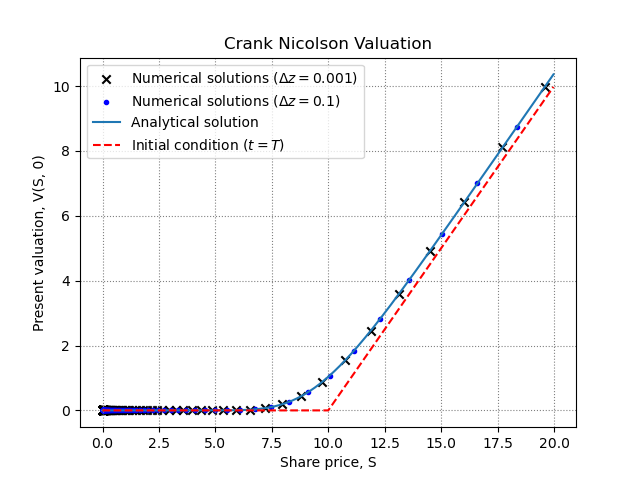

In [57]:
# solutions are of length 300 -> 300 grid points from 0-30, therefore take every tenth point instead
S1plotN = S1plot
Splot = S7plotN
S7plotN = S7plot[::100]
V7solplotN = V7solplot[::100]
V1solplotN = V1solplot
SVsolplotN = SVsolplot[::100]


plt.figure()
plt.scatter(S7plotN, V7solplotN, marker='x', color = 'black', label='Numerical solutions ($\\Delta z = 0.001$)')
plt.scatter(S1plotN, V1solplotN, marker='.', color = 'blue', label='Numerical solutions ($\\Delta z = 0.1$)')
plt.plot(S7plot, Asolplot, label = 'Analytical solution')
plt.plot(S7plot, ICplot, color='r', label='Initial condition $(t=T)$', linestyle='dashed')
plt.title('Crank Nicolson Valuation')
plt.xlabel('Share price, S')
plt.ylabel('Present valuation, V(S, 0)')
plt.grid(True, linestyle='dotted', color='grey')
plt.legend()
plt.show()